In [50]:
#importing the libraries that I will use for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [51]:
df  = pd.read_csv("C:\\Users\\Gacheru\\Documents\\Pyscripts DS\\Tip-prediction\\tips.csv")
#dropping the coloumns I am not interested in

mydata = df.drop(['size','Payer Name','CC Number','Payment ID'],axis=1)

In [52]:
#reaarranging the data
mydata = mydata[['tip','total_bill','sex','smoker','day','price_per_person']]

In [53]:
mydata

,tip,total_bill,sex,smoker,day,price_per_person
0,1.01,16.99,Female,No,Sun,8.49
1,1.66,10.34,Male,No,Sun,3.45
2,3.50,21.01,Male,No,Sun,7.00
3,3.31,23.68,Male,No,Sun,11.84
4,3.61,24.59,Female,No,Sun,6.15
...,...,...,...,...,...,...
239,5.92,29.03,Male,No,Sat,9.68
240,2.00,27.18,Female,Yes,Sat,13.59
241,2.00,22.67,Male,Yes,Sat,11.34
242,1.75,17.82,Male,No,Sat,8.91


,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


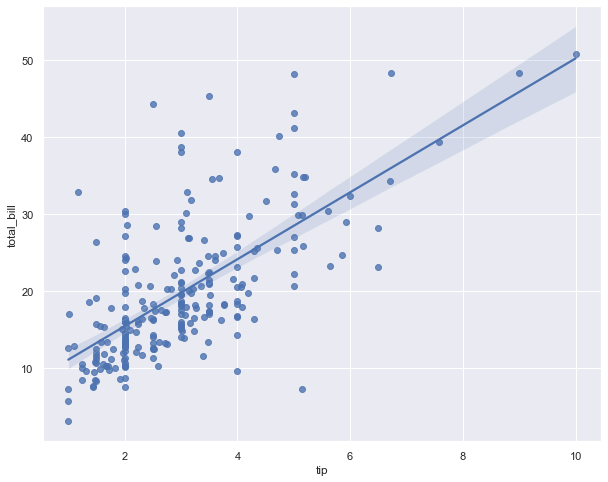

In [54]:
#we can start the vizualization aspect of the data
# let us check the correlation of tip and total_bill using a scatter plot
#The regplot() function of the Seaborn library is definitely the best way to build a scatterplot in minutes.
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=mydata["tip"], y=mydata["total_bill"])

#cheking the correlation between the total bill and tips
mydata['total_bill'].corr(mydata['tip'])

#there is a positive correlation between the total bill and tips, and since it measure both direction and magnitude
#we find that there exists a strong correlation between the data
# let us look at the covariance of the data - 
mydata[['total_bill','tip']].cov()


In [55]:
#covariance of the data is positive and high meaning that the data is moving in the same direction as cov measures direction
mydata.total_bill.cov(mydata.tip)

8.323501629224854

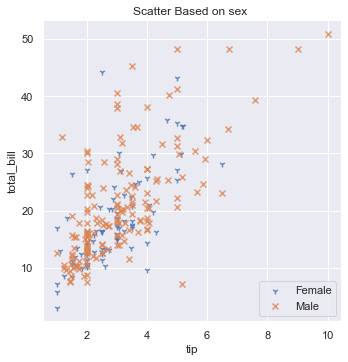

In [56]:
# Use the 'hue' argument to provide a factor variable - sex
#basic scatterplot with the ability to use color encoding for different subsets of data

sns.lmplot( x="tip", y="total_bill", data=mydata, fit_reg=False, hue='sex', legend=False,markers=["1", "x"])
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title("Scatter Based on sex ")


plt.show()

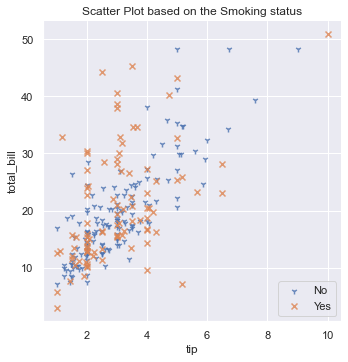

In [57]:
#Use the 'hue' argument to provide a factor variable - smoker
sns.lmplot( x="tip", y="total_bill", data=mydata, fit_reg=False, hue='smoker', legend=False,markers=["1", "x"])
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title("Scatter Plot based on the Smoking status")


plt.show()

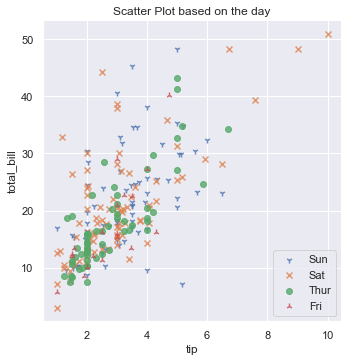

In [58]:
#Use the 'hue' argument to provide a factor variable - day
sns.lmplot( x="tip", y="total_bill", data=mydata, fit_reg=False, hue='day', legend=False,markers=["1", "x",'o','2'])
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title("Scatter Plot based on the day")


plt.show()

In [59]:
#A heatmap is a graphical representation of data where each value of a matrix is represented as a color.
heatmap_pt = pd.pivot_table(mydata,values ='total_bill', index=['tip'], columns='day')
heatmap_pt.fillna(0)


day,Fri,Sat,Sun,Thur
tip,,,,
1.00,5.75,7.64,0.00,0.00
1.01,0.00,0.00,16.99,0.00
1.10,0.00,12.90,0.00,0.00
1.17,0.00,32.83,0.00,0.00
1.25,0.00,10.29,0.00,8.51
...,...,...,...,...
6.70,0.00,0.00,0.00,34.30
6.73,0.00,48.27,0.00,0.00
7.58,0.00,39.42,0.00,0.00


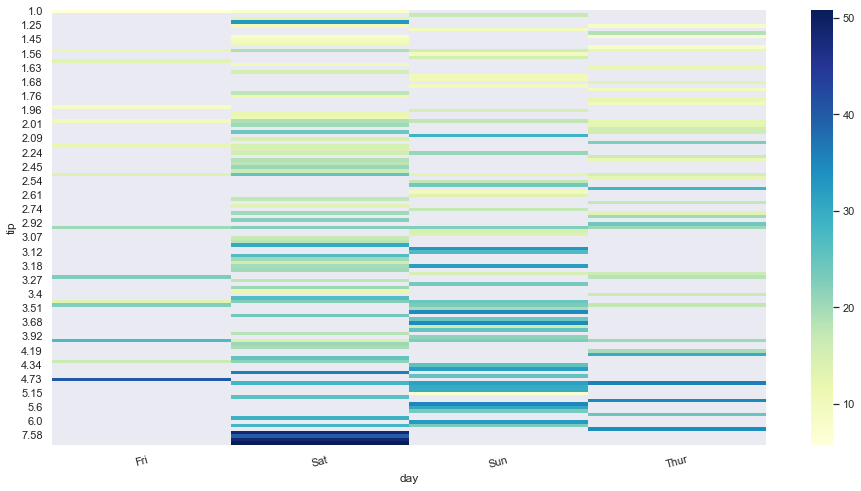

In [60]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

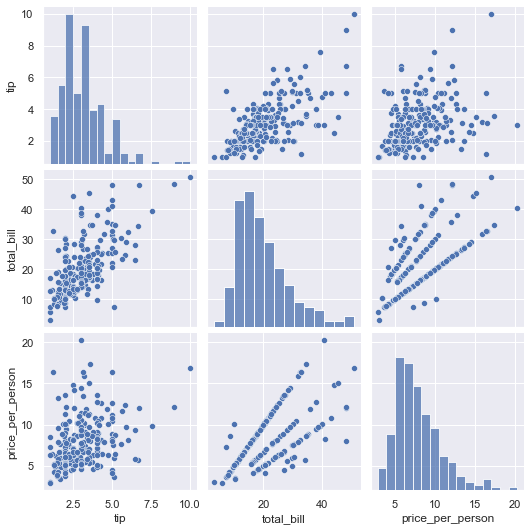

In [63]:
#A correlogram or correlation matrix allows to analyse the relationship between each pair of numeric variables of a matrix. 
#The correlation is visualised as a scatterplot. 
#The diagonal represents the distribution of each variable with a histogram or a density plot.
sns.pairplot(mydata)


<AxesSubplot:xlabel='tip', ylabel='price_per_person'>

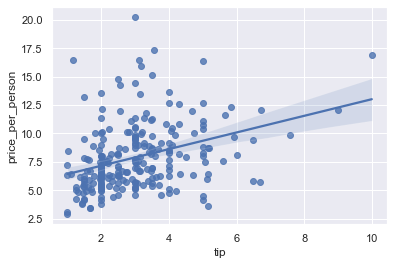

In [64]:
sns.regplot(x=mydata["tip"], y=mydata["price_per_person"])